<img src ="./images/pexels-expect-best-79873-351264.jpg" alt="Image" style="width: 100%">

## <span style="color:#87ceeb;">Understanding the Business Problems</span>

In my role as an entry-level data scientist at one of the top leading credit card companies in the U.K., I was tasked with supporting the company's goal for the new business year: to retain and grow the customer base. 

To achieve this, I began by analyzing customer churn to understand why certain customers left. The insights gained allowed me to identify gaps in the system and develop strategies to address these issues. 

Next, I focused on reactivating churned customers, leveraging the valuable customer data we still had, as it's often easier and more effective to re-engage those who have already interacted with our brand. 

Additionally, I worked on developing strategies to better retain existing customers by enhancing their engagement with our services. 

Lastly, I analyzed customer demographics, particularly age, to uncover insights that could inform targeted marketing strategies and ad campaigns for the marketing team. 

This comprehensive approach aimed to not only stop the leakage of customers but also drive future growth through more personalized retention and acquisition strategies.

Based on the above business requirements, some business questions will be infereed.


---

1. How are customers distributed across different demographics? (*Customer Demographic Segmentation* )


2. What is the demograph of the inactive users and what constituted the major reason for their attrition? (*Identifying the reasons behind customer attrition)
  
   2. a. Could dissatisfaction with customer service be contributing to inactivity? 
   

3. Which inactive customers are high risk and should be excluded and which are wrth targeting? (*Exploring customer reactivation strategies*)


4. How can we ensure we retain our most engaged customers? (*Developing methods to better engage and retain current customers*)
    4a. Based on what the data says about the customer, which services can we put more emphasis on to attract new customers?



**Key Data Fields Required for Analysis**

Fields used for the analyses:  
`Months_on_book`, `Customer_Age`, `Income_Category`,  `Education_Level`, `Marital_Status`, `Months_Inactive_12_mon`, `Total_Relationship_Count`, `Avg_Open_To_Buy`, `Revolving_Bal`, `Dependent_count`, `Contacts_Count_12_mon`,  `Avg_Utilization_Ratio`, `Customer_ID`, `Credit_Limit`, `Card Category`, `Attrition_Flag`, `CLIENTNUM`

---

## <span style="color:#87ceeb;">Begin The Analyses</span>

<img src ="./images/pexels-goumbik-669610.jpg" alt="Image" style="width: 100%">

---

### Import Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the Data

In [63]:
df = pd.read_csv(r'./BankChurners.csv')


### Data Cleaning

**Eliminate Fields Not Needed for the questions stated above**

In [64]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [65]:
needed_columns = [
    'CLIENTNUM',
    'Attrition_Flag',
    'Customer_Age', 
    'Income_Category', 
    'Education_Level', 
    'Marital_Status', 
    'Dependent_count', 
    'Months_on_book', 
    'Months_Inactive_12_mon', 
    'Total_Relationship_Count', 
    'Credit_Limit',
    'Avg_Open_To_Buy', 
    'Total_Revolving_Bal', 
    'Avg_Utilization_Ratio',
    'Contacts_Count_12_mon', 
    'Card_Category'
    ]



# df[~(df.drop(labels = needed_columns, axis =1, inplace=True))]

df = df[needed_columns]

df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Income_Category',
       'Education_Level', 'Marital_Status', 'Dependent_count',
       'Months_on_book', 'Months_Inactive_12_mon', 'Total_Relationship_Count',
       'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal',
       'Avg_Utilization_Ratio', 'Contacts_Count_12_mon', 'Card_Category'],
      dtype='object')

In [66]:
# Reset all Fields to the appropriate datatype

df.convert_dtypes()


,CLIENTNUM,Attrition_Flag,Customer_Age,Income_Category,Education_Level,Marital_Status,Dependent_count,Months_on_book,Months_Inactive_12_mon,Total_Relationship_Count,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Avg_Utilization_Ratio,Contacts_Count_12_mon,Card_Category
0,768805383,Existing Customer,45,$60K - $80K,High School,Married,3,39,1,5,12691.0,11914.0,777,0.061,3,Blue
1,818770008,Existing Customer,49,Less than $40K,Graduate,Single,5,44,1,6,8256.0,7392.0,864,0.105,2,Blue
2,713982108,Existing Customer,51,$80K - $120K,Graduate,Married,3,36,1,4,3418.0,3418.0,0,0.0,0,Blue
3,769911858,Existing Customer,40,Less than $40K,High School,Unknown,4,34,4,3,3313.0,796.0,2517,0.76,1,Blue
4,709106358,Existing Customer,40,$60K - $80K,Uneducated,Married,3,21,1,5,4716.0,4716.0,0,0.0,0,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,$40K - $60K,Graduate,Single,2,40,2,3,4003.0,2152.0,1851,0.462,3,Blue
10123,710638233,Attrited Customer,41,$40K - $60K,Unknown,Divorced,2,25,2,4,4277.0,2091.0,2186,0.511,3,Blue
10124,716506083,Attrited Customer,44,Less than $40K,High School,Married,1,36,3,5,5409.0,5409.0,0,0.0,4,Blue
10125,717406983,Attrited Customer,30,$40K - $60K,Graduate,Unknown,2,36,3,4,5281.0,5281.0,0,0.0,3,Blue


In [67]:
df.dtypes

# I'd curiously check how the income category can be refined.

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Income_Category              object
Education_Level              object
Marital_Status               object
Dependent_count               int64
Months_on_book                int64
Months_Inactive_12_mon        int64
Total_Relationship_Count      int64
Credit_Limit                float64
Avg_Open_To_Buy             float64
Total_Revolving_Bal           int64
Avg_Utilization_Ratio       float64
Contacts_Count_12_mon         int64
Card_Category                object
dtype: object

In [68]:
df.Income_Category.value_counts()


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Based on the above for the income category:

I'd need to:

- Eliminate the value 'Unknown'
- Categorize the values into understandable categories:
    - Less than $40K: low_income_earners 
    - $40K - $60K: low_income_earners       
    - 60 and below: middle_income_earners
    - 80-120: high_income_earners


In [69]:
# Drop the Unknown values

df = df[~(df['Income_Category'] == 'Unknown')]

df.Income_Category.value_counts()



Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [70]:
new_val_cat = {
'Less than $40K': 'low_income_earners',
'$40K - $60K': 'low_income_earners',
'$80K - $120K': 'middle_income_earners',
'$60K - $80K': 'low_income_earners',
'$120K +': 'high_income_earners'
}

df['Income_Category'].replace(new_val_cat, inplace=True)

df.Income_Category.value_counts()


low_income_earners       6753
middle_income_earners    1535
high_income_earners       727
Name: Income_Category, dtype: int64

Based on the fact that there were some '*Unknown*' values in the income category, I'd comb through the other columns (or data) to see if there are other occurences before proceeding to deal with the null values.

In [71]:
df.isin(['Unknown']).any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Income_Category             False
Education_Level              True
Marital_Status               True
Dependent_count             False
Months_on_book              False
Months_Inactive_12_mon      False
Total_Relationship_Count    False
Credit_Limit                False
Avg_Open_To_Buy             False
Total_Revolving_Bal         False
Avg_Utilization_Ratio       False
Contacts_Count_12_mon       False
Card_Category               False
dtype: bool

Eliminate all the Unknown values in the Education_level & Marital_Status

In [72]:
df = df[~(df['Education_Level'] == 'Unknown')]

df = df[~(df['Marital_Status'] == 'Unknown')]

df.isin(['Unknown']).any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Income_Category             False
Education_Level             False
Marital_Status              False
Dependent_count             False
Months_on_book              False
Months_Inactive_12_mon      False
Total_Relationship_Count    False
Credit_Limit                False
Avg_Open_To_Buy             False
Total_Revolving_Bal         False
Avg_Utilization_Ratio       False
Contacts_Count_12_mon       False
Card_Category               False
dtype: bool

In [73]:
df.rename(columns={'CLIENTNUM': 'Clientnum'}, inplace=True)


*I'd have dropped the Clientnum (*since there's an auto-generated index column*) but it'd be needed to reference the customers who churned and we'd like to reactivate. Their Unique IDs will be relevant for easy tracking by reevant departments on the company's database- after my analyses*


Check for Null Values

In [74]:
df.isnull().any()

# there are no null values

Clientnum                   False
Attrition_Flag              False
Customer_Age                False
Income_Category             False
Education_Level             False
Marital_Status              False
Dependent_count             False
Months_on_book              False
Months_Inactive_12_mon      False
Total_Relationship_Count    False
Credit_Limit                False
Avg_Open_To_Buy             False
Total_Revolving_Bal         False
Avg_Utilization_Ratio       False
Contacts_Count_12_mon       False
Card_Category               False
dtype: bool

In [75]:
df.reset_index(inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


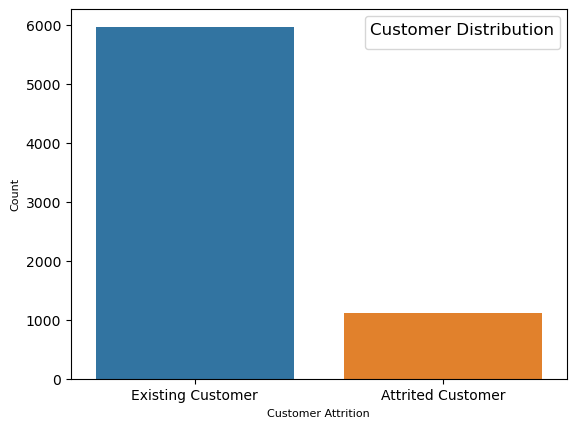

In [76]:
sns.countplot(data=df, x='Attrition_Flag')

plt.xlabel('Customer Attrition', fontsize=8)  
plt.ylabel('Count', fontsize=8)             

plt.legend(title='Customer Distribution', title_fontsize=12,  prop={'weight': 'bold'})

plt.show()

_I'm working with an imbalanced data. So, majority of the stats would have a higher proportion for  Exitsing Customers_.

---
### Analyzing the Data

1. **How are customers distributed across different demographics?** (*Customer Demographic Segmentation* )

   - **Objective**: Break down the demographics of all customers into segments to get a clearer picture of the overall customer base. This includes inactive customers, highly engaged customers, long-tenured customers,etc
   

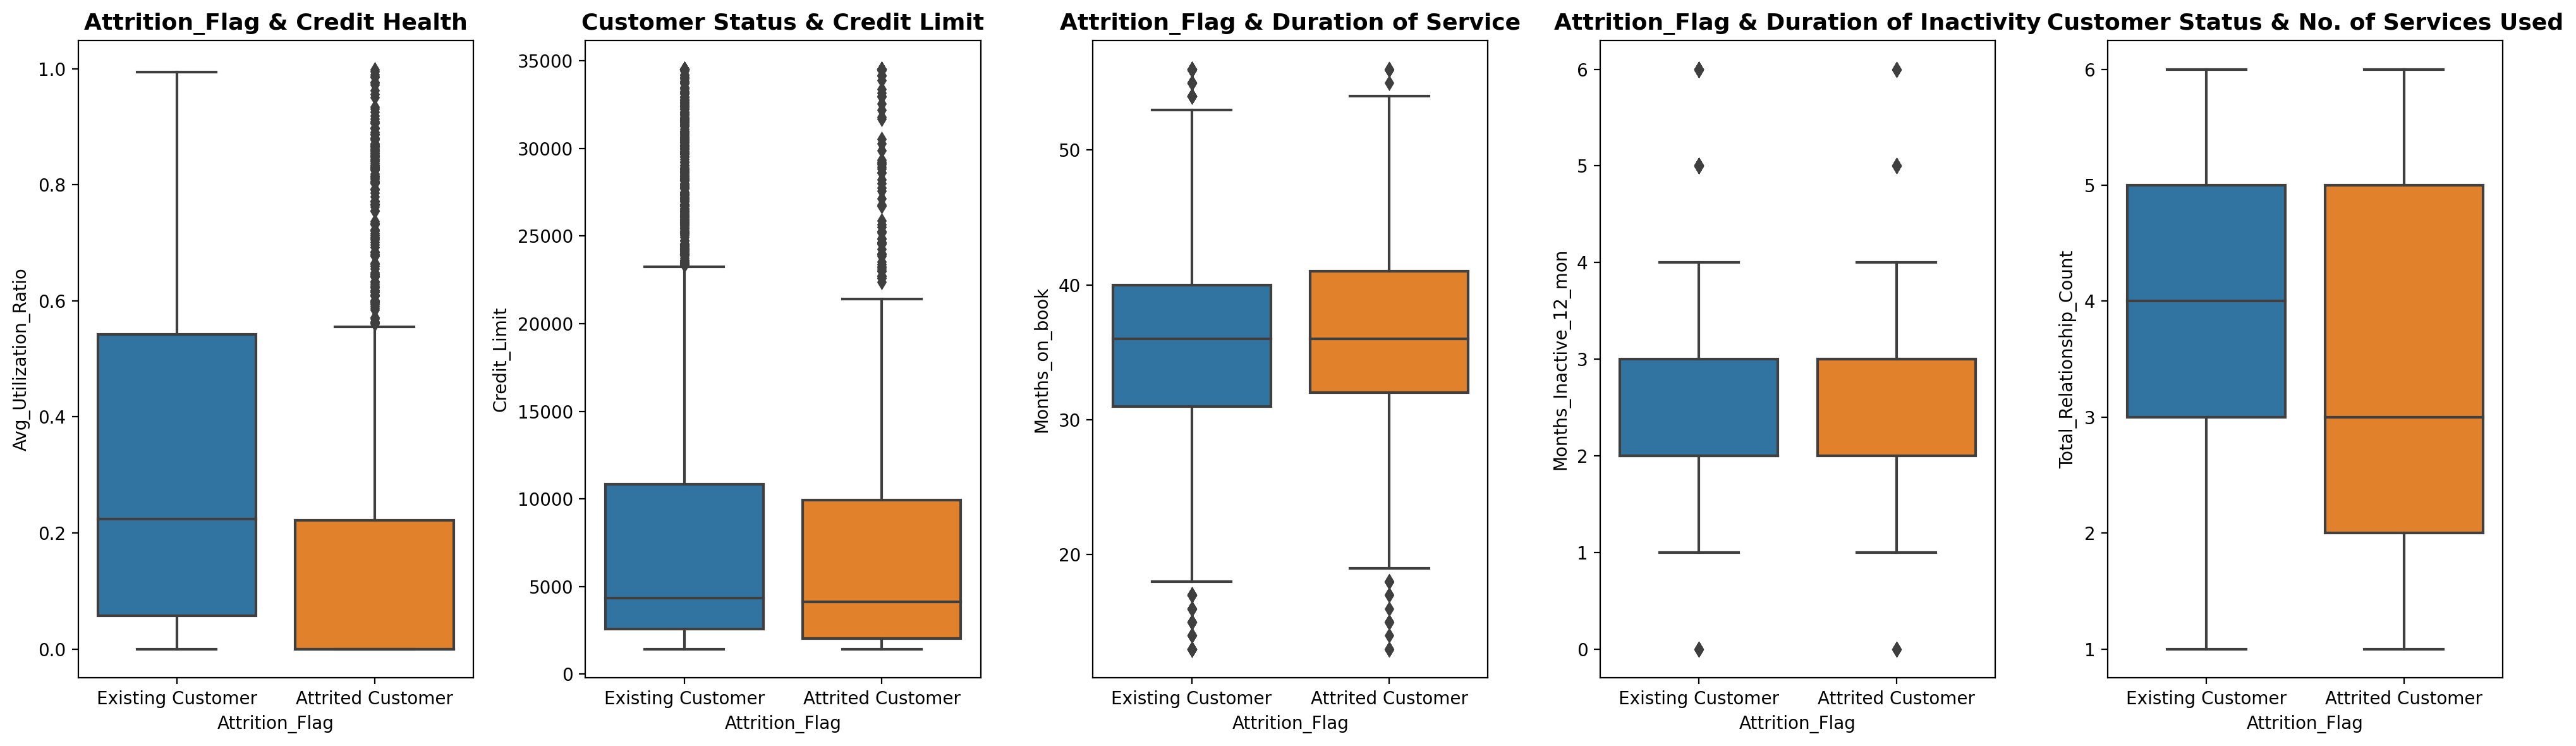

In [77]:

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), dpi=200)

sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df, ax=axes[0])
axes[0].set_title('Attrition_Flag & Credit Health', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df, ax=axes[1])
axes[1].set_title('Customer Status & Credit Limit', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df, ax=axes[2])
axes[2].set_title('Attrition_Flag & Duration of Service', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df, ax=axes[3])
axes[3].set_title('Attrition_Flag & Duration of Inactivity', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df, ax=axes[4])
axes[4].set_title('Customer Status & No. of Services Used', fontweight ='bold',fontsize=13)

plt.tight_layout()
plt.show()


*Graph Interpretations:*
- Utilizatio Ratio of Existing Customers are more overly reliant than Attrited customers
- Existing customers have their credit limit slightly higher than the Attrited customers

*Follow-up Questions:*
- what are the exact mnth_on_book durations for both customer category?
- is this a case were we can safely say if a customer surpasses a certain number of months- they're less likely to churn? or newly signed_up customers are likely to churn within the first x months of joining?

In [78]:
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']


dat = existing_customers.nsmallest(2, 'Months_on_book')

dat[['Attrition_Flag', 'Months_on_book']]

# The newest customers got signed into our services 13 months ago

,Attrition_Flag,Months_on_book
392,Existing Customer,13
396,Existing Customer,13


In [79]:
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']


dat = existing_customers.nlargest(2, 'Months_on_book')

dat[['Attrition_Flag', 'Months_on_book']]

# Longest serviced exiting customers have been with us for 4 years

,Attrition_Flag,Months_on_book
10,Existing Customer,56
127,Existing Customer,56


In [80]:
existing_customers = df[df['Attrition_Flag'].isin(['Attrited Customer'])]


dat = existing_customers.nlargest(2, 'Months_on_book')

dat[['Attrition_Flag', 'Months_on_book']]


,Attrition_Flag,Months_on_book
423,Attrited Customer,56
501,Attrited Customer,56


In [81]:
existing_customers = df[df['Attrition_Flag'].isin(['Attrited Customer'])]

dat = existing_customers.nsmallest(2, 'Months_on_book')

dat[['Attrition_Flag', 'Months_on_book']]


,Attrition_Flag,Months_on_book
1221,Attrited Customer,13
1630,Attrited Customer,13


Checking the months of inactivity

In [82]:
# Why do I have the same number of inactve months for both eisting and attrited customers?
df[['Attrition_Flag', 'Months_Inactive_12_mon']]

,Attrition_Flag,Months_Inactive_12_mon
0,Existing Customer,1
1,Existing Customer,1
2,Existing Customer,1
3,Existing Customer,1
4,Existing Customer,1
...,...,...
7076,Existing Customer,2
7077,Existing Customer,1
7078,Existing Customer,2
7079,Attrited Customer,3


In [83]:
# Curious to know why existing customers are inctive and what the highest number of inactivity is

data_sam  = df[(df['Attrition_Flag'] == 'Existing Customer') & (df['Months_Inactive_12_mon'] > 1)]
data_sam
data_sam[['Attrition_Flag', 'Months_Inactive_12_mon']].max()


# We have existing customers ho have been inactive for as long as 6 months.

Attrition_Flag            Existing Customer
Months_Inactive_12_mon                    6
dtype: object

In [84]:

data_sam  = df[(df['Attrition_Flag'] == 'Attrited Customer') & (df['Months_Inactive_12_mon'] > 1)]
data_sam
data_sam[['Attrition_Flag', 'Months_Inactive_12_mon']].max()


Attrition_Flag            Attrited Customer
Months_Inactive_12_mon                    6
dtype: object

From the above:

- Both inactive customer have the same duration of inactivity. So months of inactivity is not the reason for attrition. Probably, account closure is the reason for the label 'Attrited Customer'. Also, we have some existing customers who have been inactive- which is a concern.
- The duration of their stay with our credit srvices has no impact on them churning

Assessing Personal Demographics

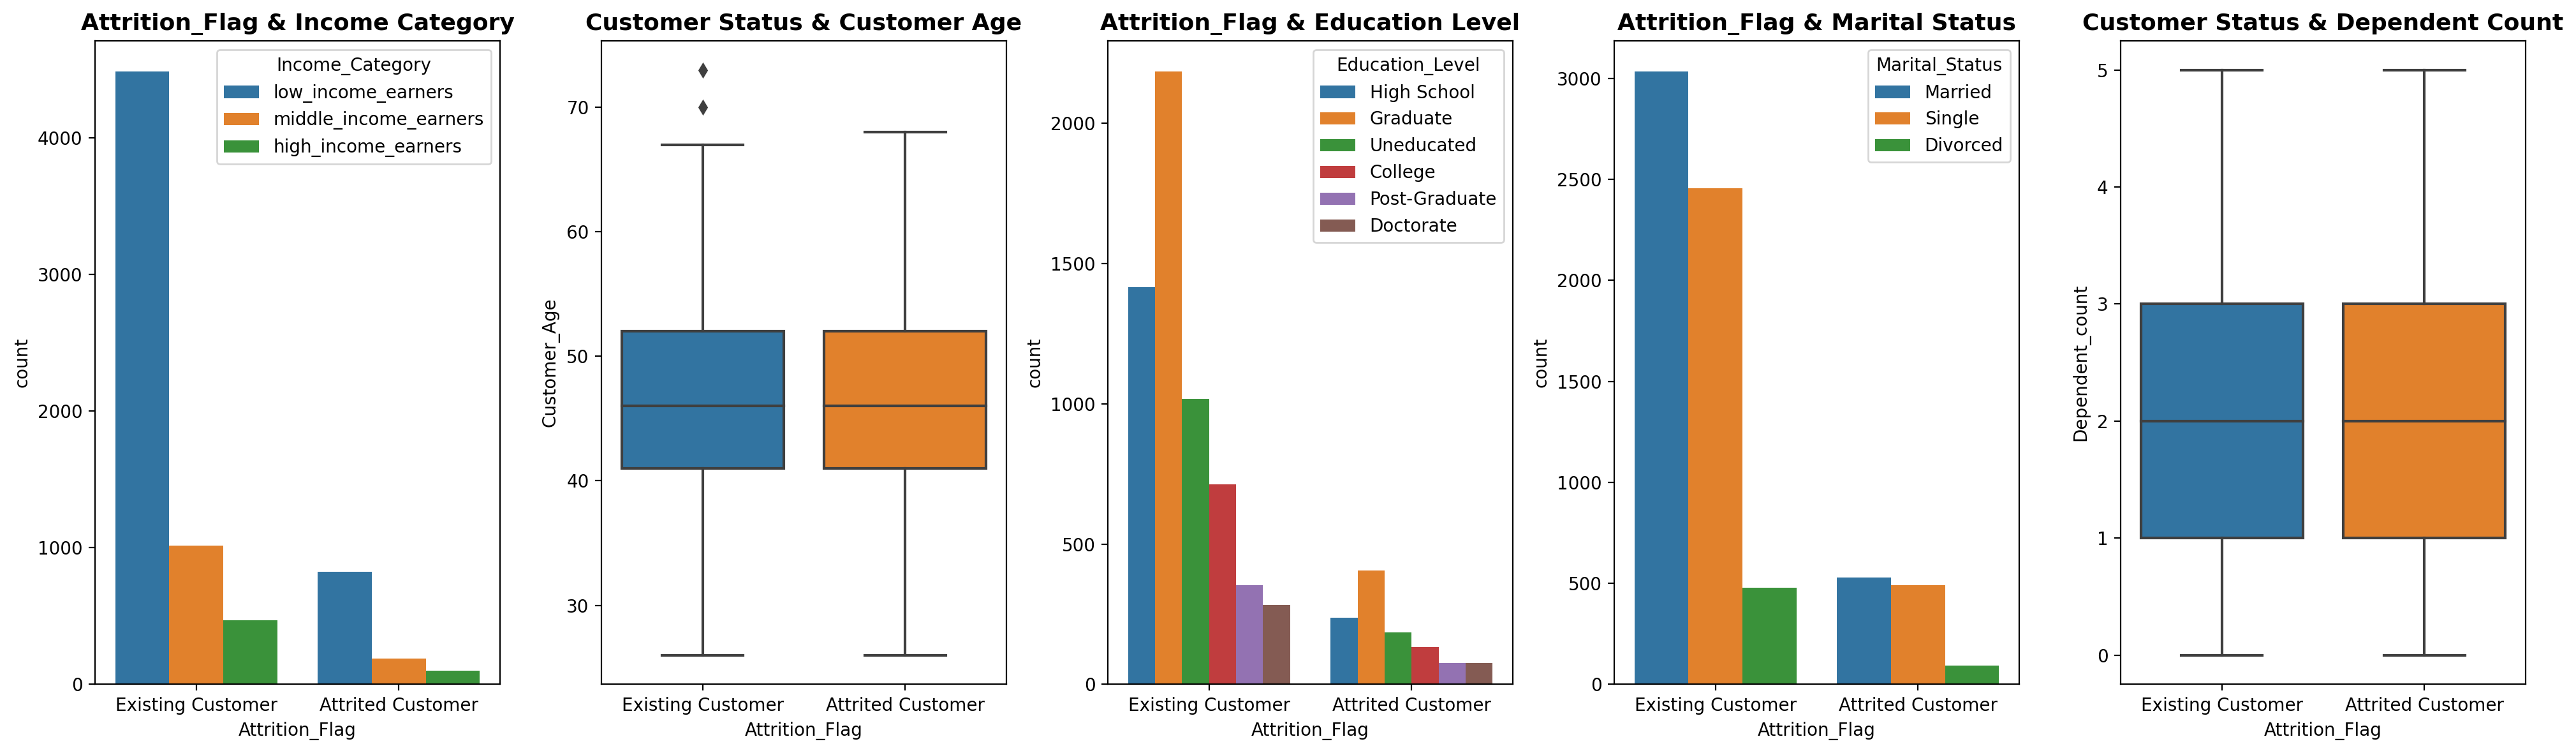

In [86]:

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), dpi=200)

sns.countplot(data = df, x='Attrition_Flag', hue='Income_Category', ax=axes[0])
axes[0].set_title('Attrition_Flag & Income Category', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, ax=axes[1])
axes[1].set_title('Customer Status & Customer Age', fontweight ='bold',fontsize=13)

sns.countplot(data = df, x='Attrition_Flag', hue='Education_Level', ax=axes[2])
axes[2].set_title('Attrition_Flag & Education Level', fontweight ='bold',fontsize=13)

sns.countplot(data = df, x='Attrition_Flag', hue='Marital_Status', ax=axes[3])
axes[3].set_title('Attrition_Flag & Marital Status', fontweight ='bold',fontsize=13)

sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df, ax=axes[4])
axes[4].set_title('Customer Status & Dependent Count', fontweight ='bold',fontsize=13)

plt.tight_layout()
plt.show()


- Most of attrited customers are married with majority having dependents of 2-3 and the highest income category is above 500.

- The data also suggests attrited customers are less educated, low_income earners with same financial (dependents) responsibilities as the existing customers. 

It'd be interesting to see the distibution of the avg_utilization rate across each income category- for each customer group

**Insights**


- *Attrition_Flag & Credit Health:* Majority of the attrited customers had a good use of their credit utilization ratio. For the purpose of customer-reactivation further analyses will be focused on this majority (<0.3), while majority of the existing customers over-utilize their credit, suggesting poor credit behavior among the latter group.


- *Customer Status & Credit Limit:* Existing customers typically have higher credit limits, but some attrited customers also show high credit limits. Could this be a case where most customers churned because they didn't get an increased credit limit?


- *Attrition_Flag & Duration of Service:* Customers have been with the company for as long as 4 years before attrition, suggesting that long-tenured customers can still churn. Newly signed up customers as early as 13 months ago also churned. Could this be a case where (i) they found a better service form a competitor? (ii) they were displeased with our service (iii) they expected a different service than they received and were dissapointed?


- *Attrition_Flag & Duration of Inactivity:* Both groups have similar levels of inactivity, indicating that inactivity was not the reason customers were labelled attritted.


- *Customer Status & Number of Services Used:* Customers are mostly engaged by using 3-5 of our services. If this numbers are indicative and were encoded, this would suggest the services labelled 3, 4, 5 should be zoned into and analyzed per dempgraph (Income and age) to identify which demograph use service 3, 4, or 5 and use this as our unique selling point when marketing aimed at these demographs. 
If the numbers 3-5 are only refelctive of the frequency of the services, we may want to drill in to identify what these services are- per demograph and use the insights for marketing too. For the sake of the available information, 3-5 would be treated as the frequency of service use and not an encoded number representing the services.


In [87]:
# Nick: Absolutely awesome insights from this! If every graph was followed by something like this, this would be a perfect EDA.

---------------------------------------------------

2. **What is the demograph of the inactive users and what constituted the major reason for their attrition?** (*Identifying the reasons behind customer attrition)
    
   - **Objective**: Zoom in on the attrited customers to assess what the data about why they left.

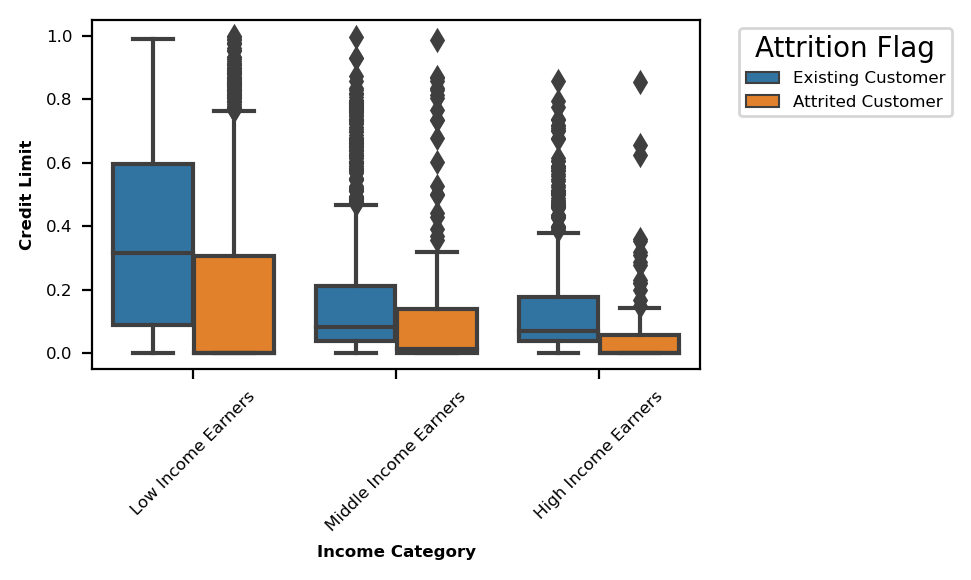

In [114]:
plt.figure(figsize=(5,3), dpi=200)


sns.boxplot (data = df, x='Income_Category', y='Avg_Utilization_Ratio', hue='Attrition_Flag', 
                order=df['Income_Category'].unique())

plt.xlabel('Income Category', fontweight = 'bold', fontsize=6)
plt.ylabel('Credit Limit', fontweight = 'bold', fontsize=6)

plt.legend(title="Attrition Flag", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=6)

plt.xticks(ticks=[0, 1, 2], labels=['Low Income Earners', 'Middle Income Earners', 'High Income Earners'], rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.tight_layout()





**Insights**

Attrited Customers:
- The low income earners mostly used above the 0.30. 
- The high income earners rarely used their credit cards, could they have churned because they had little to no use of our card.
- The middle income earners had a responsible use of the card, could they have churned because their credit limits were not increased?




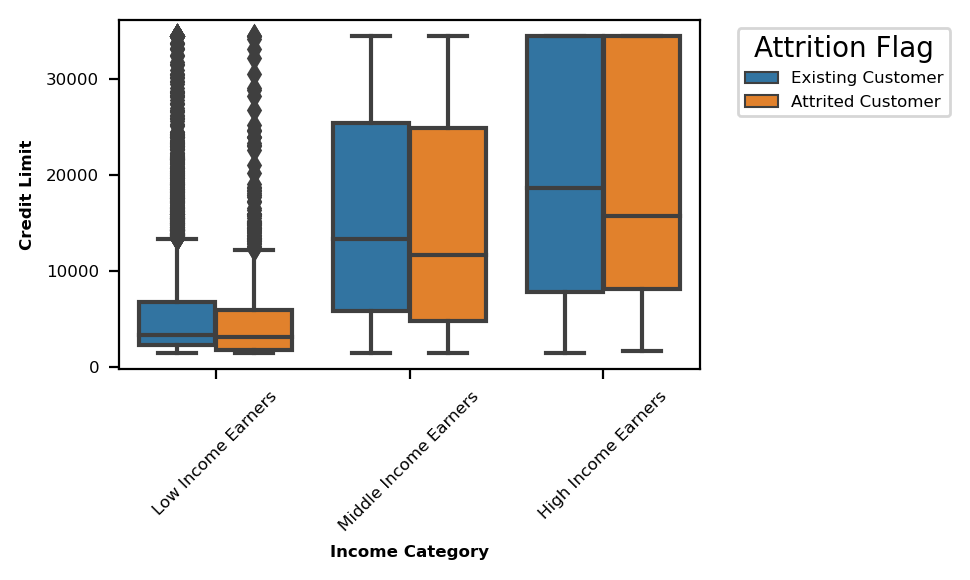

In [113]:
plt.figure(figsize=(5,3), dpi=200)


sns.boxplot (data = df, x='Income_Category', y='Credit_Limit', hue='Attrition_Flag', 
                order=df['Income_Category'].unique())

plt.xlabel('Income Category', fontweight = 'bold', fontsize=6)
plt.ylabel('Credit Limit', fontweight = 'bold', fontsize=6)

plt.legend(title="Attrition Flag", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=6)

plt.xticks(ticks=[0, 1, 2], labels=['Low Income Earners', 'Middle Income Earners', 'High Income Earners'], rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.tight_layout()



- From the above, it shows that the existing customers of both the low and middle income earners have higher credit limits than those who attrited. 

- Despite the fact that the credit limit of the high-income earners of those who attrited is rightly skewed and have population above the median compared to existing customers, this could definitely suggest one or more of these (i) they got better deals from competitors, (ii) they had no use of the card, (iii) our other services (no. 3-5) did not intrigue them as it ought to have.


<Figure size 1000x600 with 0 Axes>

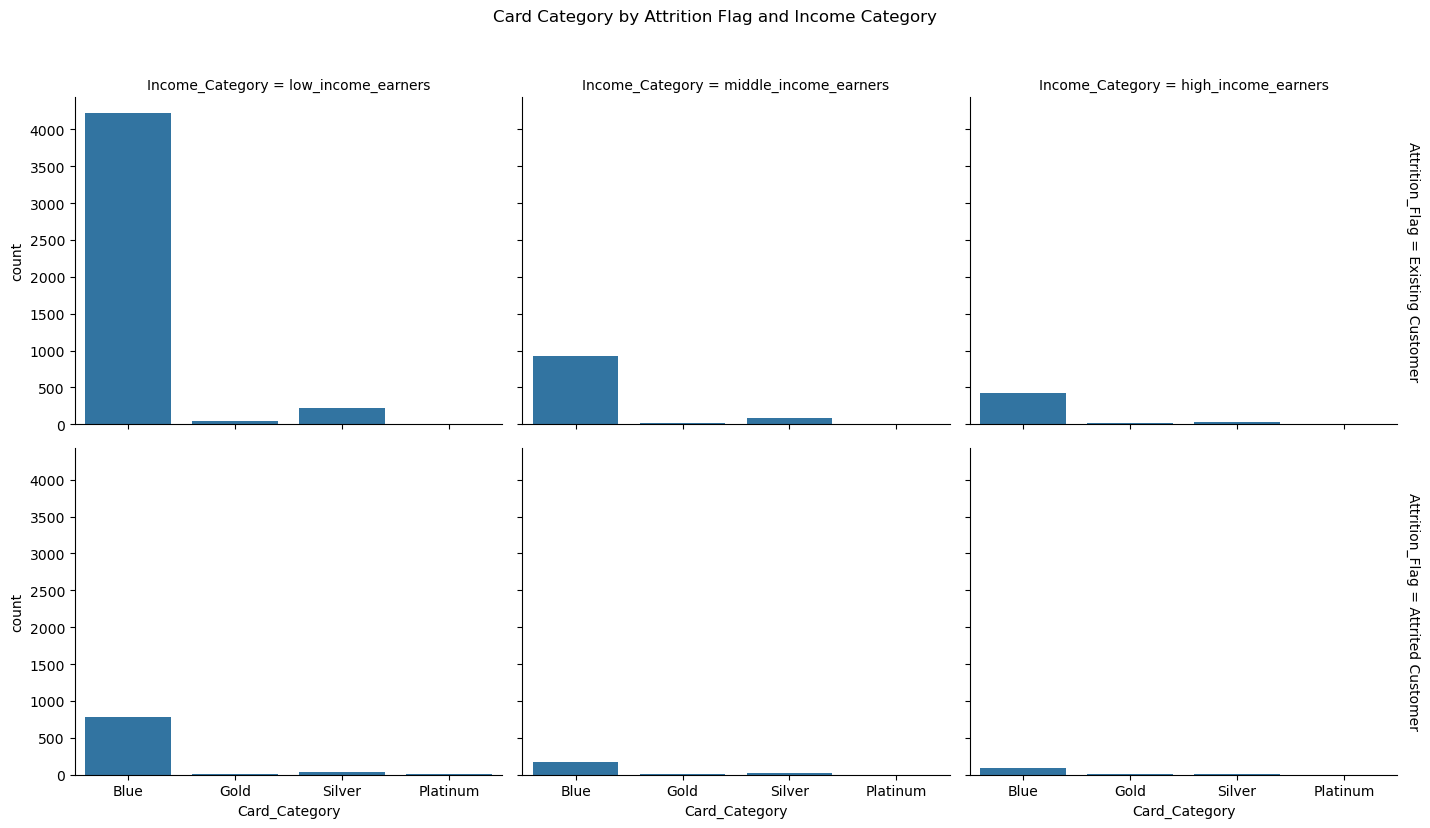

In [115]:
plt.figure(figsize=(5,3), dpi=200)

g = sns.FacetGrid(df, col='Income_Category', row='Attrition_Flag', height=4, aspect=1.2, margin_titles=True)

g.map(sns.countplot, 'Card_Category', order=df['Card_Category'].unique())

g.fig.suptitle("Card Category by Attrition Flag and Income Category", y=1.03)

plt.tight_layout()
plt.show()




**Insights**


- The Blue card was mostly used by customers across all income categories. This attest to the fact our Blue Card is the most popular and used by customers, followed by the Silver card. Since the data provided no further details about the cards- it'd have be nice to understand the card features, also to now if the Blue card is accessible to everyone (across credit limits) and the otehr crads are only accessible by customers with higher credit limits.


  2. a. **Could dissatisfaction with customer service be contributing to inactivity?** (*Customer Satisfaction and Service Improvement*)

   - **Objective**: Assess the correlation between customer service contact frequency and percentage of the attrited customer segment. If there’s a pattern, does it suggest that poor service resolution is a factor? 


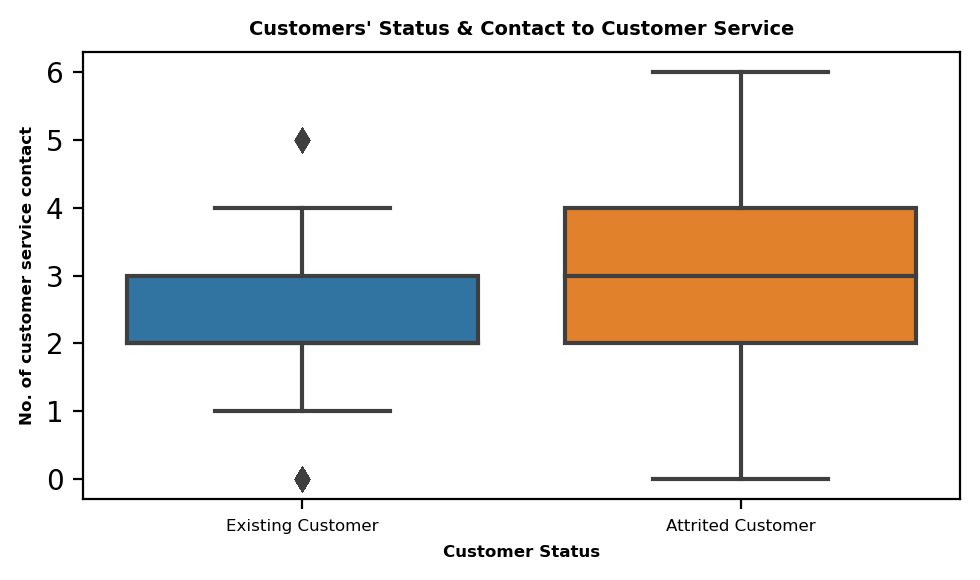

In [121]:
plt.figure(figsize = (5, 3), dpi=200)
sns.boxplot(data=df, x='Attrition_Flag', y='Contacts_Count_12_mon')

plt.ylabel('No. of customer service contact', fontsize=6, fontweight = 'bold')
plt.xlabel('Customer Status', fontsize=6, fontweight = 'bold')
plt.xticks(fontsize=6)
plt.title("Customers' Status & Contact to Customer Service", fontweight = 'bold', fontsize=7)

plt.tight_layout()


**Insight**

- The attrited customers had more contacts to the customer service. Averaging 3 contacts. The data points to the fact that they possibly attrited due to poor customer service. They experienced poor service but couldn't get as much help from the customer service.


-------------

3. **Which inactive customers are high risk and should be excluded and which are worth targeting?** (*Exploring customer reactivation strategies*)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


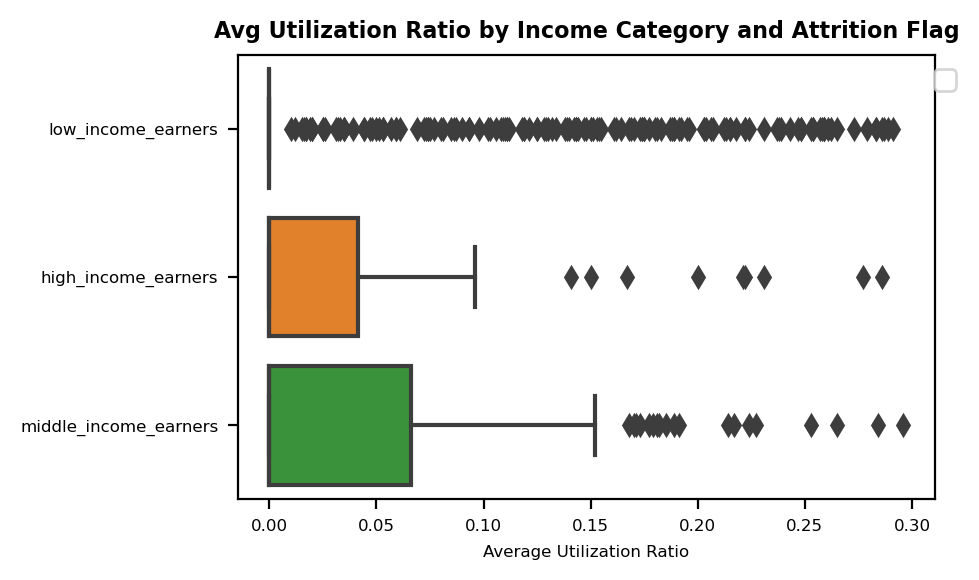

In [110]:
samp_attr = df[(df['Avg_Utilization_Ratio'] <= 0.30) & (df['Attrition_Flag'] == 'Attrited Customer')]

plt.figure(figsize=(5, 3), dpi=200)
sns.boxplot(
    data=samp_attr, 
    x='Avg_Utilization_Ratio', 
    y='Income_Category', 
    # multiple='stack'
)

plt.xlabel('Average Utilization Ratio', fontsize=6)
plt.ylabel("")
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.title('Avg Utilization Ratio by Income Category and Attrition Flag', fontweight='bold', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.tight_layout()
plt.show()


Using the avg_utilization_ration < 30 (*The standard practice is not use more than 30% of the credit limit*),the samp_attr data makes up the details of churned customers to reactivate.

It'd be good to understand the customers per age-category.

In [52]:
df.Customer_Age.unique()
df.Customer_Age.nsmallest()
# df.Customer_Age.nlargest()

396    26
424    26
466    26
640    26
734    26
Name: Customer_Age, dtype: int64

C:\Users\Teni\AppData\Local\Temp\ipykernel_15696\1724086555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_attr['Age_Binned'] = pd.cut(samp_attr['Customer_Age'], bins=bins, labels=labels)


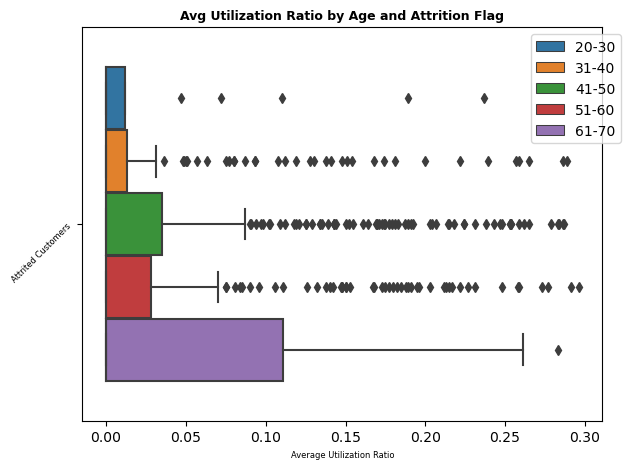

In [130]:
# fig, axes = plt.figure()
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70']

samp_attr['Age_Binned'] = pd.cut(samp_attr['Customer_Age'], bins=bins, labels=labels)

sns.boxplot(data=samp_attr, x='Avg_Utilization_Ratio', y='Attrition_Flag', hue='Age_Binned')

plt.xlabel('Average Utilization Ratio', fontsize=6)
plt.ylabel("")
plt.yticks(ticks=plt.yticks()[0], labels = ['Attrited Customers'], fontsize=6, rotation = 45)
plt.title('Avg Utilization Ratio by Age and Attrition Flag', fontweight='bold', fontsize=9)

plt.legend(bbox_to_anchor=(1.05, 1));

plt.tight_layout()
plt.show()

# customer age bin 71-80 was removed because it doesn't have enough datapoints to show some impact or significance on the outcome.



**Insights**


- The ages 20-30 were the most conscientious with the use of the credit cards. An assumption is this group are just starting life with no dependents and are working. So, therefore, they rely less on the cards
- While age 61-70 use the card the most. This could be bacuse they are retired and rely more on the credit cards.

In [132]:
samp_attr.reset_index(inplace=True)
# This makes up the dataset of those who we'd be focusing on to reactivate


C:\Users\Teni\AppData\Local\Temp\ipykernel_15696\1005377897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_attr['Age_Binned'] = pd.cut(samp_attr['Customer_Age'], bins=bins, labels=labels)


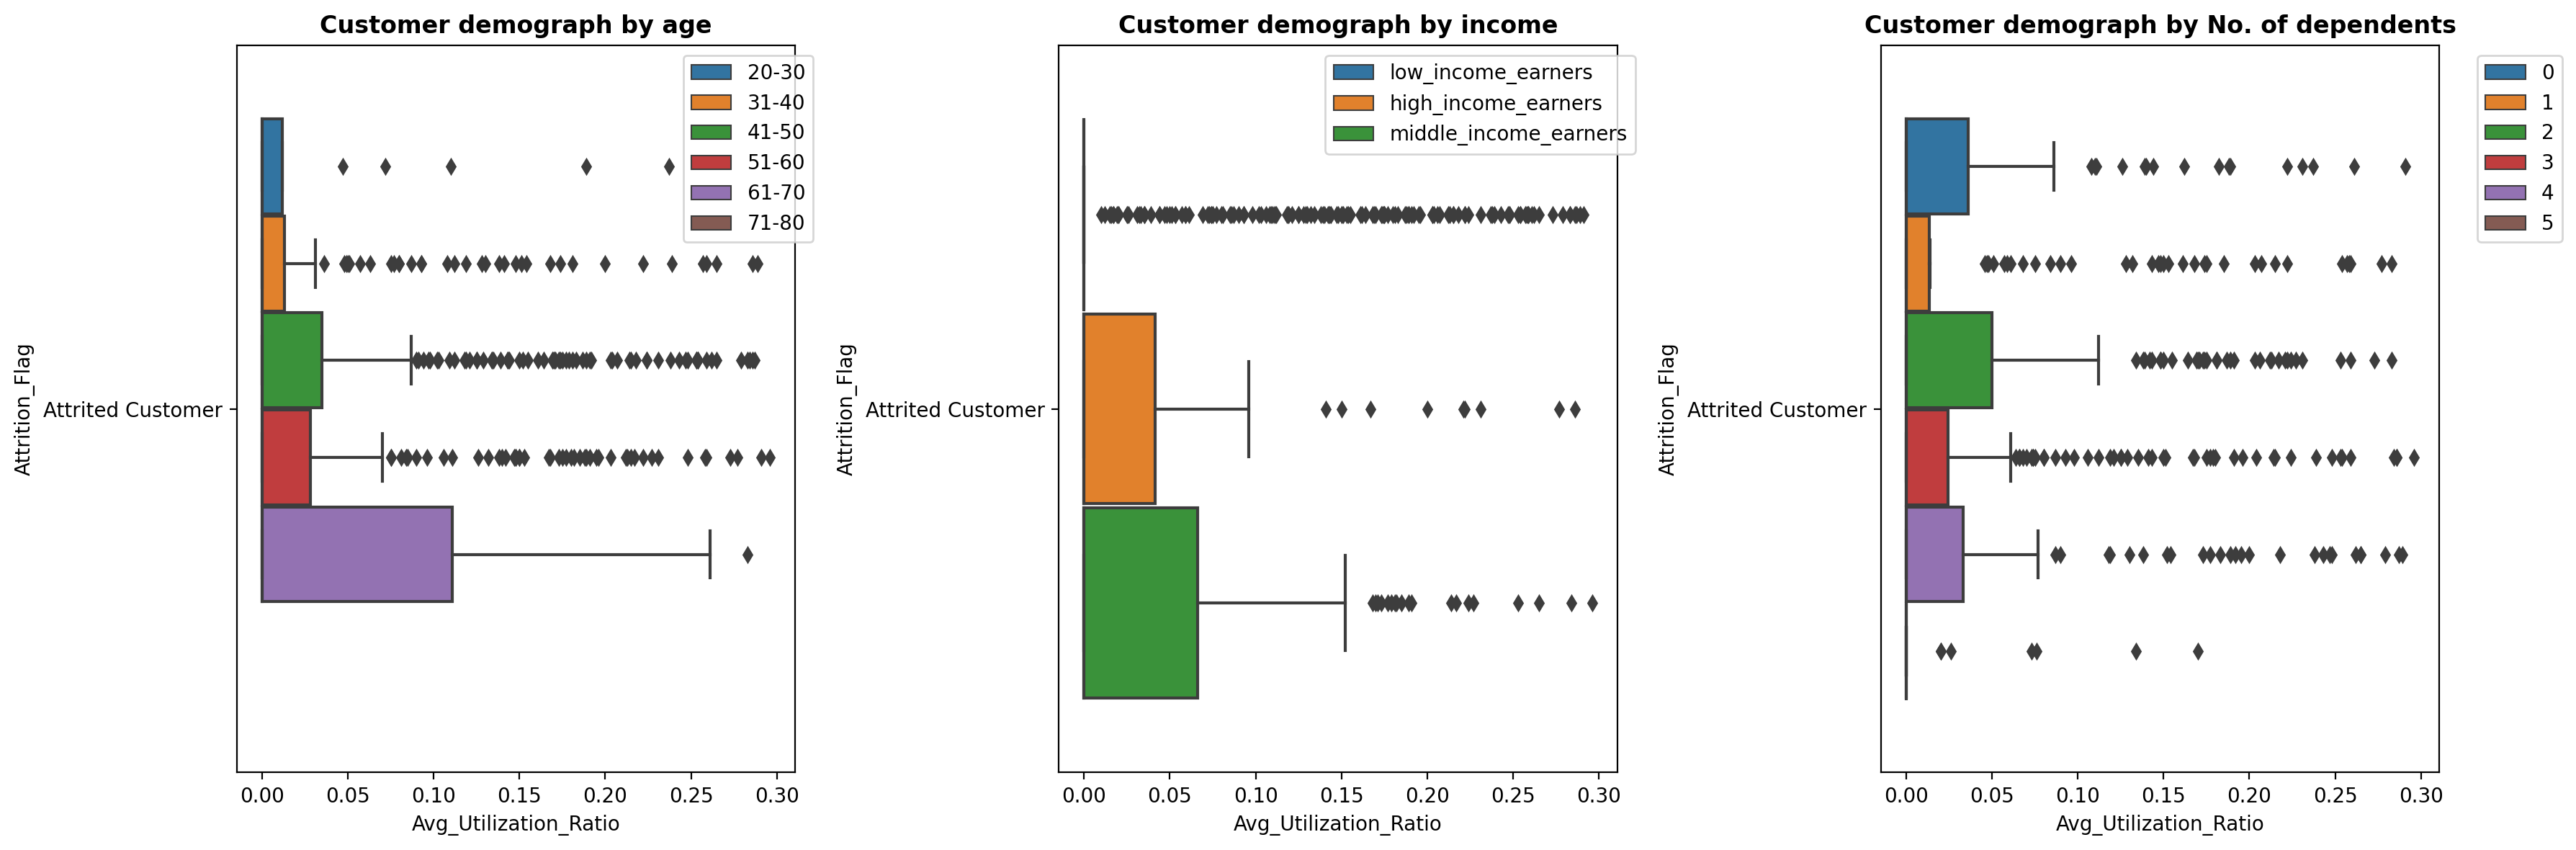

In [133]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']

samp_attr['Age_Binned'] = pd.cut(samp_attr['Customer_Age'], bins=bins, labels=labels)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), dpi = 200)

sns.boxplot(data=samp_attr, x='Avg_Utilization_Ratio', y='Attrition_Flag', hue='Age_Binned', ax=axes[0])
axes[0].set_title('Customer demograph by age', fontweight ='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1));


sns.boxplot(data=samp_attr, x='Avg_Utilization_Ratio', y='Attrition_Flag', hue='Income_Category', ax=axes[1])
axes[1].set_title('Customer demograph by income', fontweight ='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1));


sns.boxplot(data=samp_attr, x='Avg_Utilization_Ratio', y='Attrition_Flag', hue='Dependent_count', ax=axes[2])
axes[2].set_title('Customer demograph by No. of dependents', fontweight ='bold')
axes[2].legend(bbox_to_anchor=(1.05, 1));


plt.tight_layout()
plt.subplots_adjust()



**Since this data sample will be relevant to marketing team in reactvating *relevant* customers, here are some marketing startegies across the demographs**


1. **Graduates, Married, Low-Income, with Dependents:**  
   - Offer **15% cashback** on school-related expenses (e.g., tuition, supplies).  
   - Promote **low-interest short-term loans** for family emergencies or childcare.  
   - Highlight benefits for dependents like **free financial education for kids**.

2. **High School Graduates, Low-Income, Single, No Dependents:**  
   - Provide **10% discounts** on essential purchases (e.g., groceries, transportation).  
   - Offer **zero-fee credit card upgrades** to build credit responsibly.  
   - Market small credit lines for unexpected expenses to promote financial independence.

3. **High-Income, Graduates, No Dependents:**  
   - Introduce **exclusive rewards programs** for travel, dining, and entertainment with **20% cashback**.  
   - Highlight premium card benefits, such as **concierge services** and **higher credit limits**.  
   - Encourage reactivation with **welcome bonuses** like free miles or points for card usage.



- This data sample will be relevant to marketing team in reactvating *relevant* customers

In [135]:
samp_attr

,level_0,index,Clientnum,Attrition_Flag,Customer_Age,Income_Category,Education_Level,Marital_Status,Dependent_count,Months_on_book,Months_Inactive_12_mon,Total_Relationship_Count,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Avg_Utilization_Ratio,Contacts_Count_12_mon,Card_Category,Age_Binned
0,12,21,708508758,Attrited Customer,62,low_income_earners,Graduate,Married,0,49,3,2,1438.3,1438.3,0,0.000,3,Blue,61-70
1,33,54,714374133,Attrited Customer,56,high_income_earners,Graduate,Married,2,36,3,1,15769.0,15769.0,0,0.000,3,Blue,51-60
2,37,61,712030833,Attrited Customer,48,low_income_earners,Graduate,Married,2,35,4,2,34516.0,34516.0,0,0.000,4,Silver,41-50
3,89,127,720201033,Attrited Customer,53,middle_income_earners,Graduate,Married,2,41,3,3,11669.0,9442.0,2227,0.191,2,Blue,51-60
4,99,140,789322833,Attrited Customer,48,low_income_earners,High School,Married,5,38,3,1,8025.0,8025.0,0,0.000,3,Blue,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,7066,10108,714471183,Attrited Customer,47,middle_income_earners,Graduate,Divorced,4,39,3,4,17504.0,17028.0,476,0.027,4,Blue,41-50
868,7070,10112,708564858,Attrited Customer,33,high_income_earners,College,Married,2,20,1,2,34516.0,34516.0,0,0.000,4,Gold,31-40
869,7071,10113,713733633,Attrited Customer,27,low_income_earners,High School,Divorced,0,36,3,2,13303.0,10786.0,2517,0.189,2,Blue,20-30
870,7079,10124,716506083,Attrited Customer,44,low_income_earners,High School,Married,1,36,3,5,5409.0,5409.0,0,0.000,4,Blue,41-50


----

4. **How can we ensure we retain our most engaged customers?** (*Retention of Highly Engaged Customers*)

   - **Objective**: Identify the services our existing customers are engaged with. How can we ensure we keep them constantly engaged based on their demographs- so we do not lose them?
 
   4a. Based on what the data says about the customer, which services can we put more emphasis on to attract new customers?
    
    

In [58]:
samp_exi = df[df['Attrition_Flag'] == 'Existing Customer']

# gh = df[df['Attrition_Flag'].isin(['Existing Customer'])]

samp_exi


,index,Clientnum,Attrition_Flag,Customer_Age,Income_Category,Education_Level,Marital_Status,Dependent_count,Months_on_book,Months_Inactive_12_mon,Total_Relationship_Count,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Avg_Utilization_Ratio,Contacts_Count_12_mon,Card_Category
0,0,768805383,Existing Customer,45,low_income_earners,High School,Married,3,39,1,5,12691.0,11914.0,777,0.061,3,Blue
1,1,818770008,Existing Customer,49,low_income_earners,Graduate,Single,5,44,1,6,8256.0,7392.0,864,0.105,2,Blue
2,2,713982108,Existing Customer,51,middle_income_earners,Graduate,Married,3,36,1,4,3418.0,3418.0,0,0.000,0,Blue
3,4,709106358,Existing Customer,40,low_income_earners,Uneducated,Married,3,21,1,5,4716.0,4716.0,0,0.000,0,Blue
4,5,713061558,Existing Customer,44,low_income_earners,Graduate,Married,2,36,1,3,4010.0,2763.0,1247,0.311,2,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,10116,714109308,Existing Customer,46,middle_income_earners,College,Single,5,36,2,1,13187.0,10946.0,2241,0.170,3,Blue
7075,10117,712503408,Existing Customer,57,middle_income_earners,Graduate,Married,2,40,3,6,17925.0,16016.0,1909,0.106,4,Blue
7076,10120,710841183,Existing Customer,54,low_income_earners,High School,Single,1,34,2,5,13940.0,11831.0,2109,0.151,0,Blue
7077,10121,713899383,Existing Customer,56,low_income_earners,Graduate,Single,1,50,1,4,3688.0,3082.0,606,0.164,4,Blue


C:\Users\Teni\AppData\Local\Temp\ipykernel_19852\2362465379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_exi.loc[:, 'Age_Binned'] = pd.cut(samp_exi['Customer_Age'], bins=bins, labels=labels)


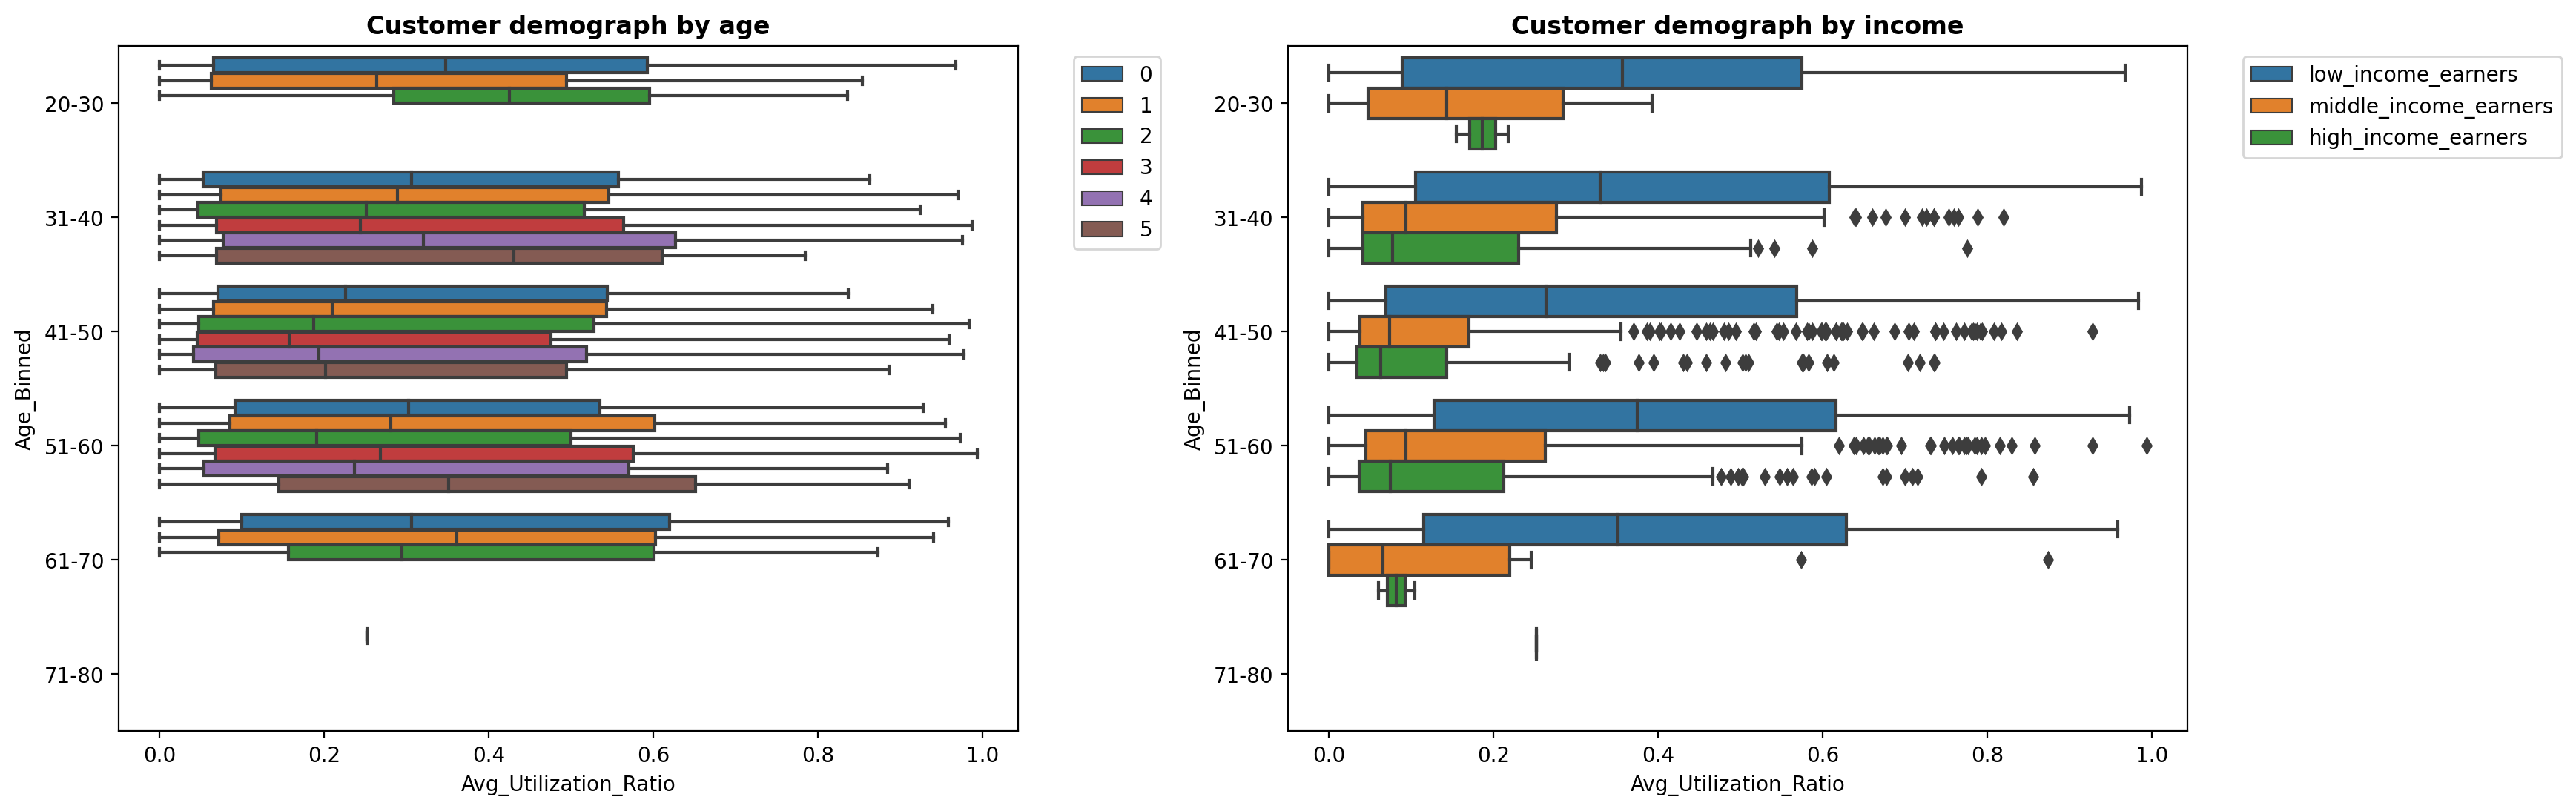

In [59]:
samp_exi = df[df['Attrition_Flag'].isin(['Existing Customer'])]

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']

samp_exi.loc[:, 'Age_Binned'] = pd.cut(samp_exi['Customer_Age'], bins=bins, labels=labels)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi = 200)

sns.boxplot(data=samp_exi, x='Avg_Utilization_Ratio', y='Age_Binned', hue='Dependent_count', ax=axes[0])
axes[0].set_title('Customer demograph by age', fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1));


sns.boxplot(data=samp_exi, x='Avg_Utilization_Ratio', y='Age_Binned', hue='Income_Category', ax=axes[1])
axes[1].set_title('Customer demograph by income', fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1));


# sns.scatterplot(data=samp_exi, x='Avg_Utilization_Ratio', y='Dependent_count', ax=axes[2])
# axes[2].set_title('Customer demograph by No. of dependents')
# axes[2].legend(bbox_to_anchor=(1.05, 1));


plt.subplots_adjust(wspace=0.3)  

plt.show()


- Although the low income earners have their utilization ration range from 0-0.9, the majority of them lean more on credit utilization. They make up majority of the customer base. 

- Despite the fact that the middle income earners have their utilization ratio from 0-0.9, the majority of the middle income earners between the age range (20-30, 41-50, 51-60) have an avg health credit use while majority of those from age 31-40, 61-70 lean heavily on the credit use. This could because they make up the working poulation and are saddled with more responibility (student loan repayment, car and house payments, beginning a family, etc), even though the data also shows the number of dependents on the first group- this could be indicative of the data's depiction that they have the highest number of 4 dependednts and the other 61-70 rarely have any work going on for them. 

- The avg utilization ratio of the high income earners range from0-0.45 with a couple of more outliers. Majority of the high-income earners rarely use their credit across the age ranges. It's not surprising to note that the high income earners 61-70 have a > 0.02 utilization ratio. While those 20-30 have a > 0.25 utilization ratio - suggesting low appetite for risk and healthy credit use. Where the major users are between the ages of 31-60 (the most active pouplation).

- the data shows that those with an avg utilization rate above >0.30 with no dependents have a poor utilization rate.

- 20-30: those with o dependents make up the most of over dependency on their credit cards. This will definitely be majority of the low-income earners.

- 31-60: those with 1,2,3, 4 & 5 dependents make up the most of the over-reliance on the credit cards. 

- 61-70: the majority have 0 dependents. The most is 2. All of which also are relaint on the credit. Those with no dependent are the most reliant.

---

## <span style="color:#87ceeb;">Conclusion</span>

### **Customer Attrition & Retention Summary**

**Reason for Attrition:**  
   Attrition primarily would have stemmed from anyother reason (such as account closure) aside from inactivity. Attrited customers had multiple interactions with customer service (averaging 3 contacts) but did not receive satisfactory resolutions, leading to their decision to leave. 

##### **General Recommendation and Actions to the Business Manager:**

- **<span style="color:#87ceeb;">Customer Service Improvements:</span>** Focus on continuous service enhancements and customer experience. Attrited customers had multiple interactions with customer service (averaging 3 contacts) but did not receive satisfactory resolutions, leading to their decision to leave. The KPI for the cutsomer sevice should refelct retaing customers and a course to re-orinetate them on how to better manage issues from customers- _For the HR department._
 
- **<span style="color:#87ceeb;">High-Risk Exclusion & Targeting:</span>** Customers who regularly exceed the 30% credit utilization threshold were excluded from re-engagement efforts to help the marketing team focus on this set for customer reactivation. _For the Marketing department._

- **<span style="color:#87ceeb;">Retention Strategy:</span>**  We have some existing customers whose months of inactivities are same as those attrited. To retain existingd customers- we can achieve this by providing personalized offers and targeted financial products based on their demographic needs and credit usage patterns. The data showed that services 3-5 were mostly used. Where these numbers are indicative of encoded services- we amy want to double-down on these services as our selling points. However, where these numbers are in fact the frequency of the services- we may have t get the data from the product team to know for a fact which services fall within these frequncy count. _For the Marketing department._




**Export Cleaned data For Tableau Viz**

In [66]:
df.to_csv('C:\\Users\\Teni\\Desktop\\Codeop\\Tableau\\Llyods_Customer_Churn\\Llyods_Customer_Churn.csv', index=False)  # index=False to avoid writing row numbers


In [38]:
samp_attr

,index,Clientnum,Attrition_Flag,Customer_Age,Income_Category,Education_Level,Marital_Status,Dependent_count,Months_on_book,Months_Inactive_12_mon,Total_Relationship_Count,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Avg_Utilization_Ratio,Contacts_Count_12_mon,Card_Category,Age_Binned
12,21,708508758,Attrited Customer,62,low_income_earners,Graduate,Married,0,49,3,2,1438.3,1438.3,0,0.000,3,Blue,61-70
33,54,714374133,Attrited Customer,56,high_income_earners,Graduate,Married,2,36,3,1,15769.0,15769.0,0,0.000,3,Blue,51-60
37,61,712030833,Attrited Customer,48,low_income_earners,Graduate,Married,2,35,4,2,34516.0,34516.0,0,0.000,4,Silver,41-50
89,127,720201033,Attrited Customer,53,middle_income_earners,Graduate,Married,2,41,3,3,11669.0,9442.0,2227,0.191,2,Blue,51-60
99,140,789322833,Attrited Customer,48,low_income_earners,High School,Married,5,38,3,1,8025.0,8025.0,0,0.000,3,Blue,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,10108,714471183,Attrited Customer,47,middle_income_earners,Graduate,Divorced,4,39,3,4,17504.0,17028.0,476,0.027,4,Blue,41-50
7070,10112,708564858,Attrited Customer,33,high_income_earners,College,Married,2,20,1,2,34516.0,34516.0,0,0.000,4,Gold,31-40
7071,10113,713733633,Attrited Customer,27,low_income_earners,High School,Divorced,0,36,3,2,13303.0,10786.0,2517,0.189,2,Blue,20-30
7079,10124,716506083,Attrited Customer,44,low_income_earners,High School,Married,1,36,3,5,5409.0,5409.0,0,0.000,4,Blue,41-50


In [41]:
samp_attr['Customer_Age'].max()

65